# MLP w TensorFlow



In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Learning Rate Scheduling

  * Po ustawieniu wartości hiperparametrowych tworzymy nie trnowalną zmienną **global_step** (zainicjowaną na 0), aby śledzić aktualny numer iteracji.

  * Następnie definiujemy wykładniczo szybkość uczenia (z $\eta_0 = 0,1$ i $r = 10 000$) za pomocą funkcji 
  **Exponential_decay ()**. 
  * Następnie tworzymy optymalizator (w tym przykładzie MomentumOptimizer), wykorzystując nowej szybkości uczenia. 
  * Na koniec tworzymy operację uczenia, wywołując metodę **minimize()** optymalizatora; 
  * Ponieważ przekazujemy mu zmienną **global_step** to automatycznie otrzymamy znieniającą się szybkość 

In [6]:
n_inputs = 28*28 # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [7]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

he_init = tf.contrib.layers.variance_scaling_initializer()

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu, kernel_initializer=he_init)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu, kernel_initializer=he_init)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")    
    
with tf.name_scope("loss"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss") 
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate,
                                       momentum=0.9)
    training_op = optimizer.minimize(loss)  
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, tf.argmax(y, 1), 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))   
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
n_epochs = 20
batch_size = 64

array_acc_test_g = []
array_acc_test_adam=[]

In [10]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(mnist.train.num_examples // batch_size):
            print("\r{}%".format(100 * batch_index //  (mnist.train.num_examples // batch_size) ), end="")
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(" ", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)   
        array_acc_test_g.append(acc_test)

99%  0 Train accuracy: 0.90625 Test accuracy: 0.9528
99%  1 Train accuracy: 0.984375 Test accuracy: 0.9571
99%  2 Train accuracy: 1.0 Test accuracy: 0.9672
99%  3 Train accuracy: 0.984375 Test accuracy: 0.9745
99%  4 Train accuracy: 1.0 Test accuracy: 0.9754
99%  5 Train accuracy: 0.984375 Test accuracy: 0.9728
99%  6 Train accuracy: 1.0 Test accuracy: 0.9774
99%  7 Train accuracy: 0.984375 Test accuracy: 0.9785
99%  8 Train accuracy: 0.984375 Test accuracy: 0.9787
99%  9 Train accuracy: 1.0 Test accuracy: 0.9761
99%  10 Train accuracy: 0.984375 Test accuracy: 0.9774
99%  11 Train accuracy: 0.984375 Test accuracy: 0.9796
99%  12 Train accuracy: 1.0 Test accuracy: 0.9782
99%  13 Train accuracy: 1.0 Test accuracy: 0.98
99%  14 Train accuracy: 1.0 Test accuracy: 0.9794
99%  15 Train accuracy: 1.0 Test accuracy: 0.9801
99%  16 Train accuracy: 1.0 Test accuracy: 0.9798
99%  17 Train accuracy: 1.0 Test accuracy: 0.9804
99%  18 Train accuracy: 1.0 Test accuracy: 0.9796
99%  19 Train accuracy:

In [11]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

he_init = tf.contrib.layers.variance_scaling_initializer()

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu, kernel_initializer=he_init)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu, kernel_initializer=he_init)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")    
    
with tf.name_scope("loss"):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss") 
    
learning_rate = 0.01

with tf.name_scope("train"):
    initial_learning_rate = 0.1
    decay_steps = 10000
    decay_rate = 1/10
    global_step = tf.Variable(0, trainable=False, name="global_step")
    learning_rate = tf.train.exponential_decay(initial_learning_rate, global_step,
                                               decay_steps, decay_rate)
    
    optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=0.9)
    training_op = optimizer.minimize(loss, global_step=global_step)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, tf.argmax(y, 1), 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))   
    
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [12]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(n_epochs):
        for batch_index in range(mnist.train.num_examples // batch_size):
            print("\r{}%".format(100 * batch_index //  (mnist.train.num_examples // batch_size) ), end="")
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(" ", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)   
        array_acc_test_adam.append(acc_test)

99%  0 Train accuracy: 0.984375 Test accuracy: 0.9634
99%  1 Train accuracy: 0.96875 Test accuracy: 0.9713
99%  2 Train accuracy: 0.953125 Test accuracy: 0.9781
99%  3 Train accuracy: 1.0 Test accuracy: 0.9795
99%  4 Train accuracy: 1.0 Test accuracy: 0.9814
99%  5 Train accuracy: 1.0 Test accuracy: 0.983
99%  6 Train accuracy: 1.0 Test accuracy: 0.9823
99%  7 Train accuracy: 1.0 Test accuracy: 0.9833
99%  8 Train accuracy: 1.0 Test accuracy: 0.9834
99%  9 Train accuracy: 1.0 Test accuracy: 0.9838
99%  10 Train accuracy: 1.0 Test accuracy: 0.9838
99%  11 Train accuracy: 1.0 Test accuracy: 0.9842
99%  12 Train accuracy: 1.0 Test accuracy: 0.9845
99%  13 Train accuracy: 1.0 Test accuracy: 0.9844
99%  14 Train accuracy: 1.0 Test accuracy: 0.9837
99%  15 Train accuracy: 1.0 Test accuracy: 0.984
99%  16 Train accuracy: 1.0 Test accuracy: 0.984
99%  17 Train accuracy: 1.0 Test accuracy: 0.984
99%  18 Train accuracy: 1.0 Test accuracy: 0.984
99%  19 Train accuracy: 1.0 Test accuracy: 0.9839


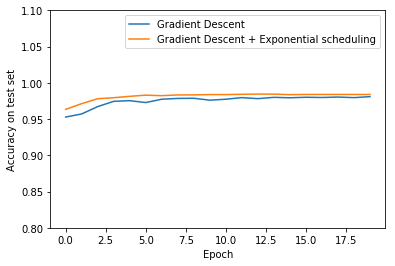

In [14]:
plt.figure()
plt.plot(array_acc_test_g, label='Gradient Descent')
plt.plot(array_acc_test_adam, label='Gradient Descent + Exponential scheduling')
plt.ylim(0.8,1.1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy on test set')
plt.legend()
plt.show()